In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# set chinese font
plt.rcParams['font.sans-serif'] = ['Consolas']
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# load dataset
# f8 execute the next line code
# feature, tags
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# test_size:
# random_state:

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
# k=5

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Classification result: 
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



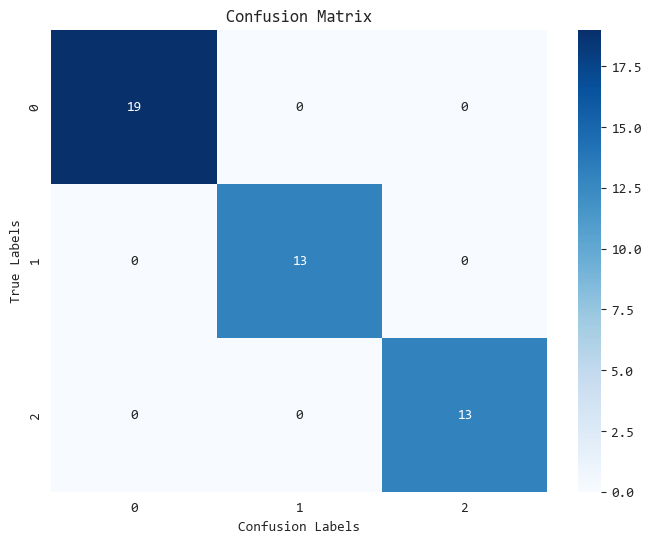

In [18]:
# print classification report

print("Classification result: ")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# visualization for confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Confusion Labels')
plt.ylabel('True Labels')
plt.show()

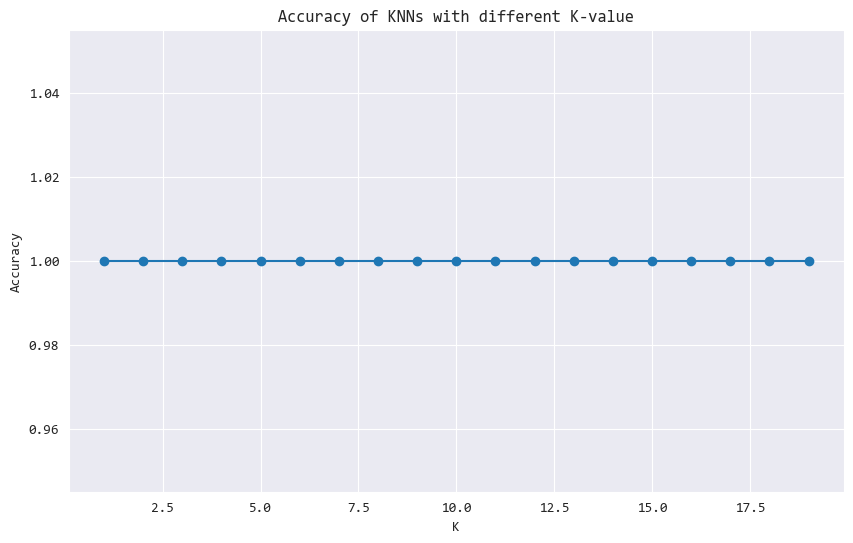

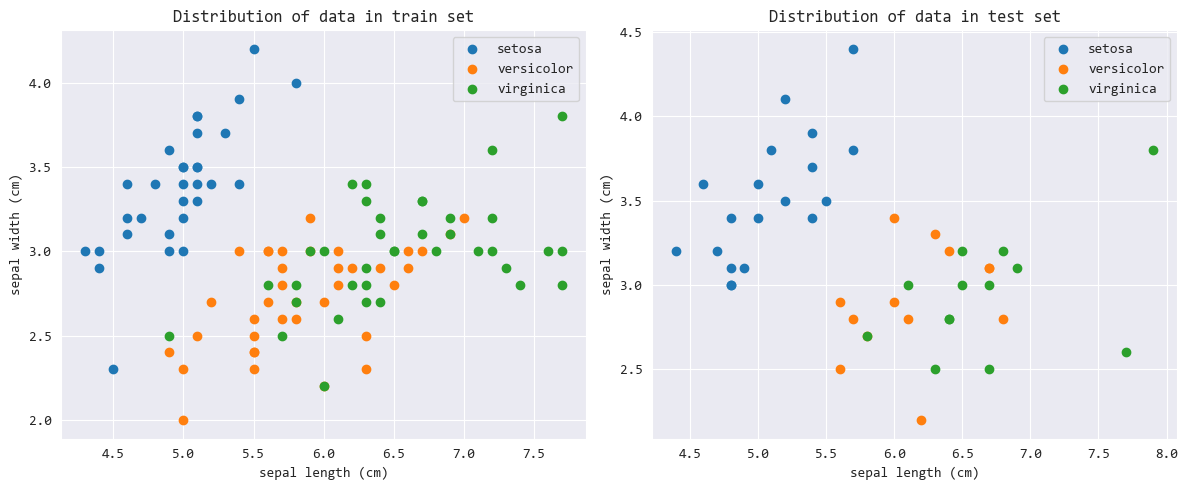

In [20]:
# 比较不同k值的性能
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, 'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy of KNNs with different K-value")
plt.grid(True)
plt.show()

# visualization for 2d features
# select first 2 features
plt.figure(figsize=(12,5))

# visualization for train set
plt.subplot(1,2,1)
for i in range(3):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                label=iris.target_names[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Distribution of data in train set")
plt.legend()

plt.subplot(1,2,2)
for i in range(3):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1],
                label=iris.target_names[i])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Distribution of data in test set")
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
best_k = k_range[np.argmax(scores)]
print(f'\nbest k-value:{best_k}')
print(f'best accuracy: {max(scores):.4f}')


best k-value:1
best accuracy: 1.0000


In [24]:
# cross evaluation
from sklearn.model_selection import cross_val_score
best_knn = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(best_knn, X, y, cv=5)
print(f'\nResult of cross evaluation: ')
print(f'Average Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2: .4f})')


Result of cross evaluation: 
Average Accuracy: 0.9600 (+/-  0.0499)


# What is cross 